# Imports

In [2]:
import os
import sys

sys.path.append("../src")
FIGS_PATH = "../figs"

import itertools
import random
import time

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import text_flappy_bird_gym
from IPython.display import clear_output
from tqdm import tqdm

from agents import BaseAgent, MonteCarloAgent
from plotting import plot_policy, plot_state_values

np.random.seed(42)
random.seed(42)

# Monte-Carlo Agent

In [5]:
env = gym.make("TextFlappyBird-v0", height=15, width=20, pipe_gap=4)

mc_agent = MonteCarloAgent(
    env,
    alpha=0.02,
    gamma=0.9,
    epsilon=1.0,
    epsilon_decay=0.9999,
    epsilon_min=0.1,
)
epsilons, episode_rewards, episode_lengths = mc_agent.train(20_000, max_reward=5_000)

100%|██████████| 20000/20000 [01:27<00:00, 229.65it/s]


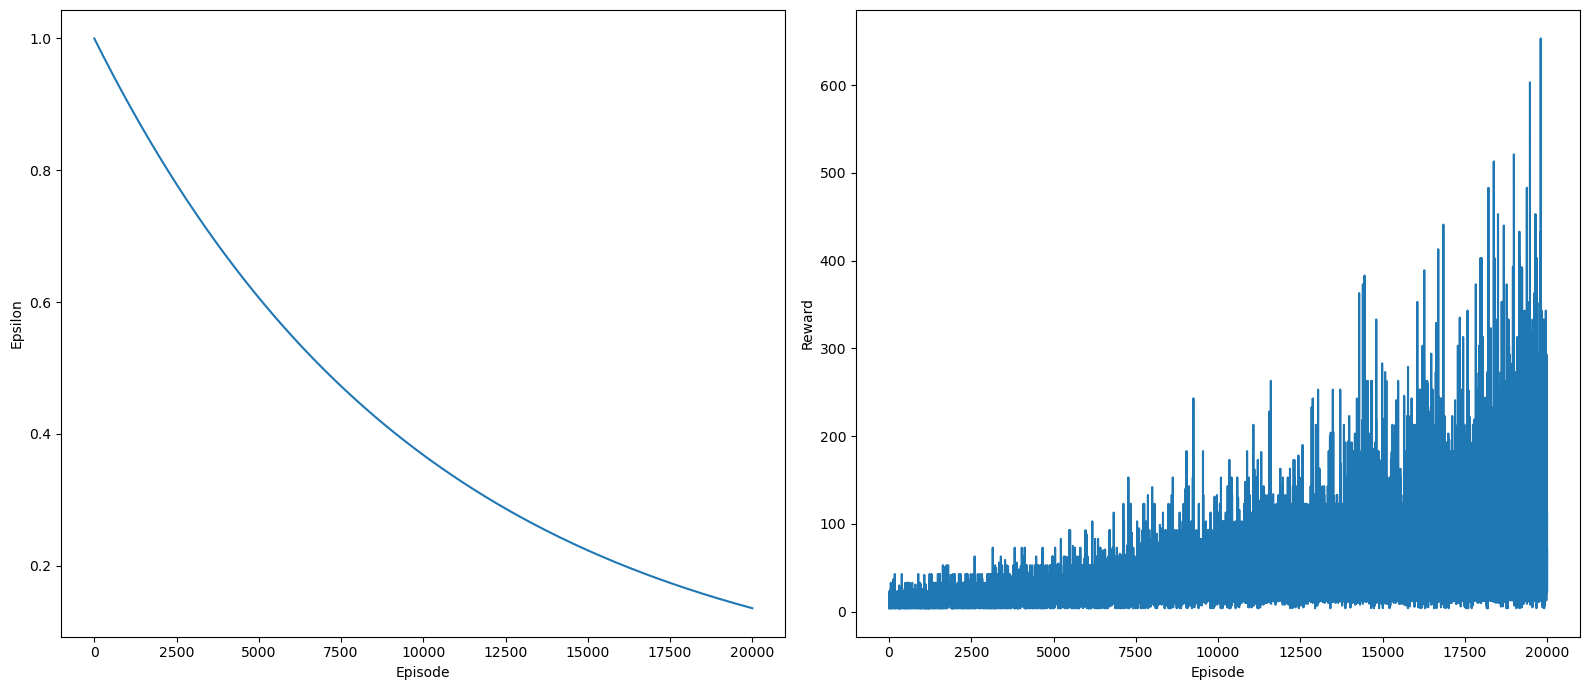

In [6]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
plt.plot(epsilons)
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.subplot(122)
plt.plot(episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.tight_layout()
# plt.savefig(os.path.join(FIGS_PATH, "mc-train.png"))
plt.show()

100%|██████████| 100/100 [00:13<00:00,  7.64it/s]


[]

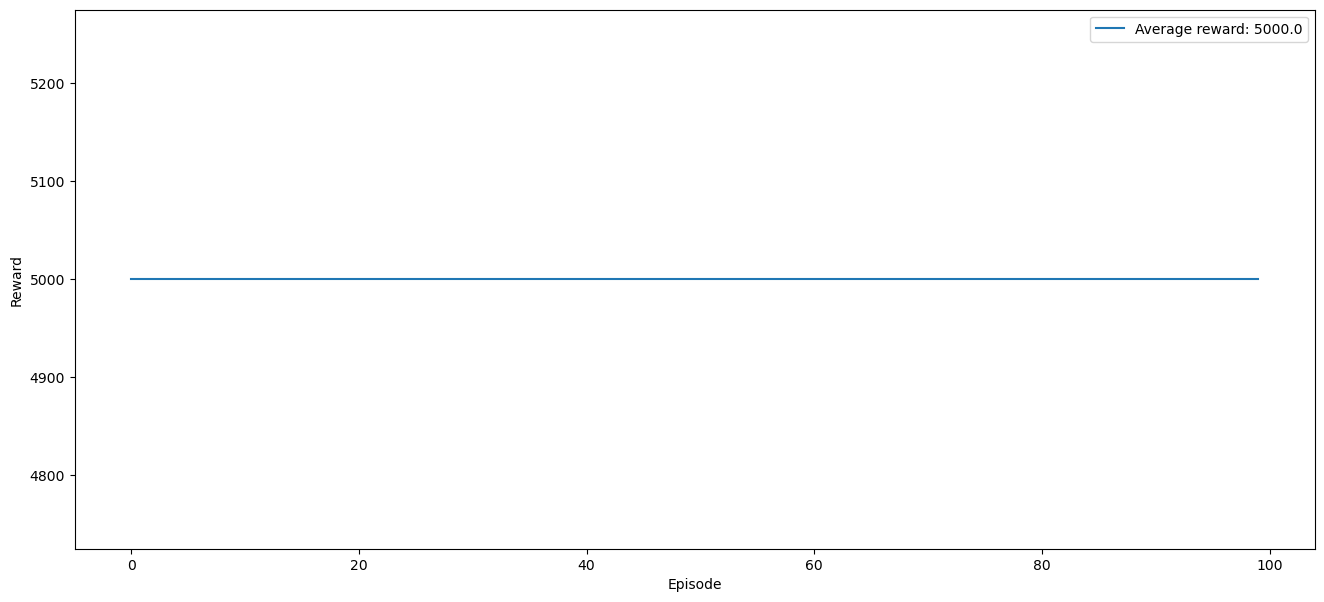

In [7]:
rewards = mc_agent.test(100, max_reward=5_000)

plt.figure(figsize=(16, 7))
plt.plot(rewards, label=f"Average reward: {np.mean(rewards)}")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
# plt.savefig(os.path.join(FIGS_PATH, "mc-test.png"))
plt.plot()

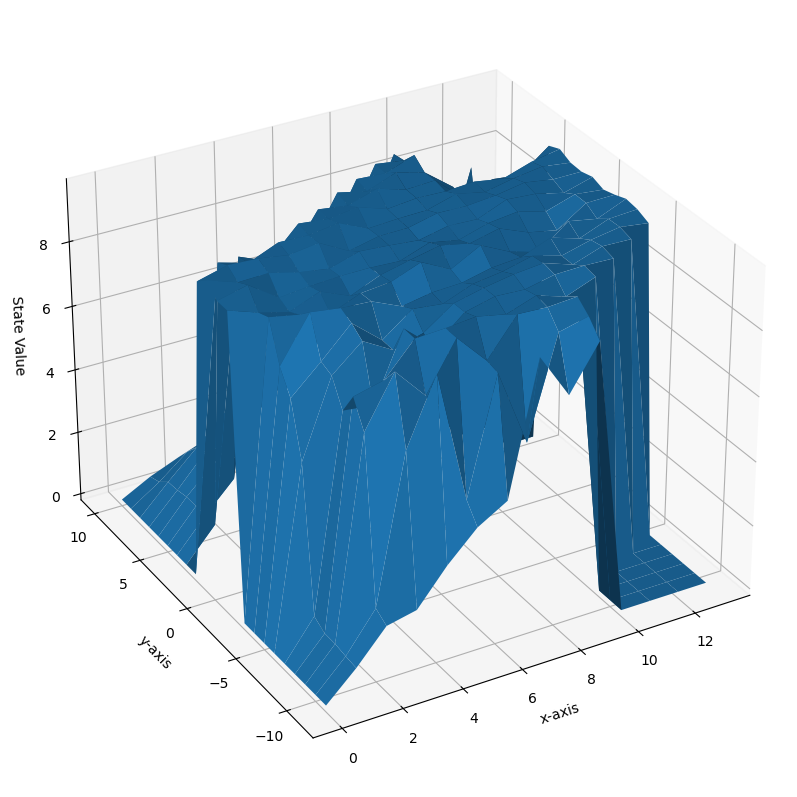

In [8]:
plot_state_values(
    mc_agent.Q,
    title="",
    # save_file=os.path.join(FIGS_PATH, "mc-state-values.png"),
)

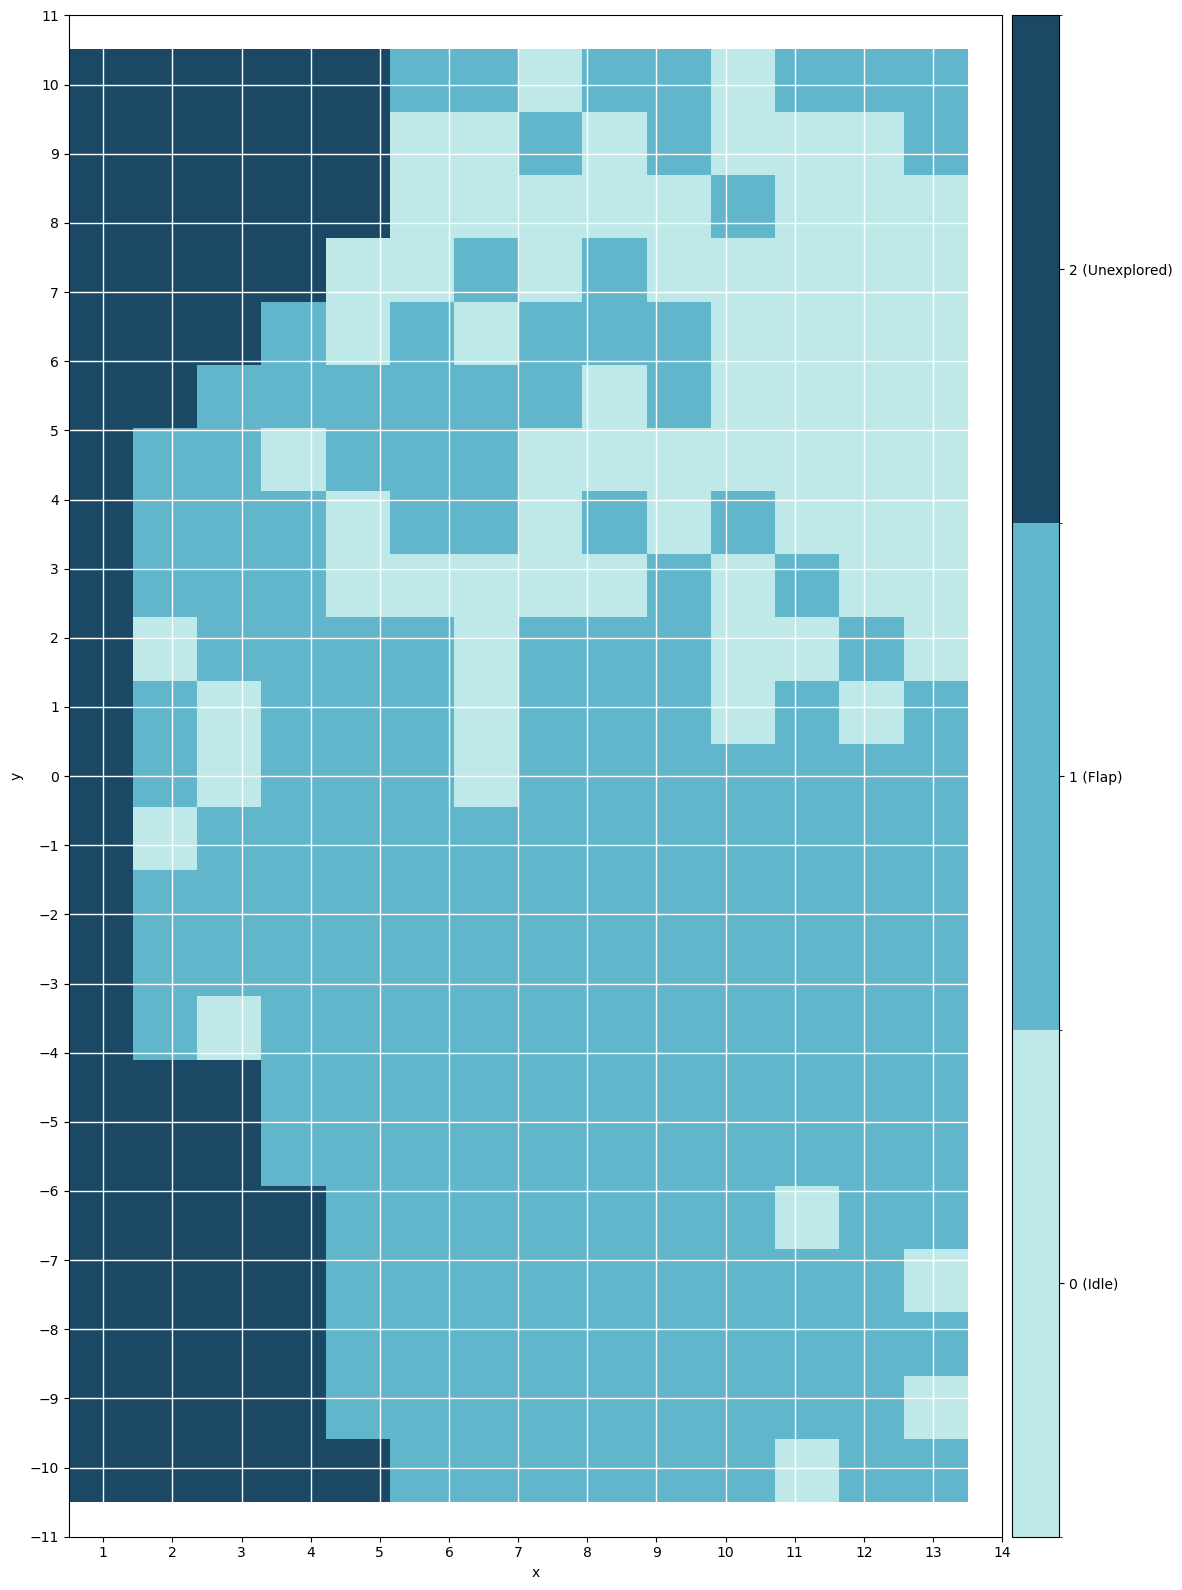

In [9]:
plot_policy(
    mc_agent.Q,
    title="",
    # save_file=os.path.join(FIGS_PATH, "mc-policy.png"),
)

# Parameter sweep

In [3]:
gammas = [0.9, 0.95, 0.99]
alphas = [0.02, 0.01, 0.001]
max_rewards = [100, 1000, 5000]
num_episodes = [1000, 5000, 10000, 20000]

In [4]:
best_params = None
best_reward = float('-inf')

env = gym.make("TextFlappyBird-v0", height=15, width=20, pipe_gap=4)

results = []

for gamma, alpha, max_reward, num_episode in itertools.product(gammas, alphas, max_rewards, num_episodes):
    
    mc_agent = MonteCarloAgent(
        env,
        alpha=alpha,
        gamma=gamma,
        epsilon=1.0,
        epsilon_decay=0.9999,
        epsilon_min=0.1,
    )
    epsilons, episode_rewards, episode_lengths = mc_agent.train(num_episode, max_reward=max_reward)
    
    avg_reward = sum(episode_rewards) / len(episode_rewards)

    results.append({
        "gamma": gamma,
        "alpha": alpha, 
        "max_reward": max_reward,
        "num_episode": num_episode,
        "avg_reward": avg_reward 
    })
    
    if avg_reward > best_reward:
        best_reward = avg_reward
        best_params = {'gamma': gamma, 'alpha': alpha, 'max_reward': max_reward, 'num_episode': num_episode}

results_df = pd.DataFrame(results)

print("Best parameters:", best_params)
print("Best average reward:", best_reward)

# 29m 3.6s
# Best parameters: {'gamma': 0.95, 'alpha': 0.01, 'max_reward': 5000, 'num_episode': 20000}
# Best average reward: 39.11075

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 20000/20000 [00:36<00:00, 543.04it/s]

Best parameters: {'gamma': 0.95, 'alpha': 0.01, 'max_reward': 5000, 'num_episode': 20000}
Best average reward: 40.7446


In [8]:
results_df.sort_values(by="avg_reward", ascending=False).head()

,gamma,alpha,max_reward,num_episode,avg_reward
59,0.95,0.01,5000,20000,40.74460
19,0.90,0.01,1000,20000,39.47685
43,0.95,0.02,1000,20000,39.43825
47,0.95,0.02,5000,20000,39.09395
23,0.90,0.01,5000,20000,38.99745


# Best parameters

In [6]:
env = gym.make("TextFlappyBird-v0", height=15, width=20, pipe_gap=4)

mc_agent = MonteCarloAgent(
    env,
    alpha=0.01,
    gamma=0.95,
    epsilon=1.0,
    epsilon_decay=0.9999,
    epsilon_min=0.1,
)
epsilons, episode_rewards, episode_lengths = mc_agent.train(20_000, max_reward=5_000)

100%|██████████| 20000/20000 [00:59<00:00, 338.54it/s]


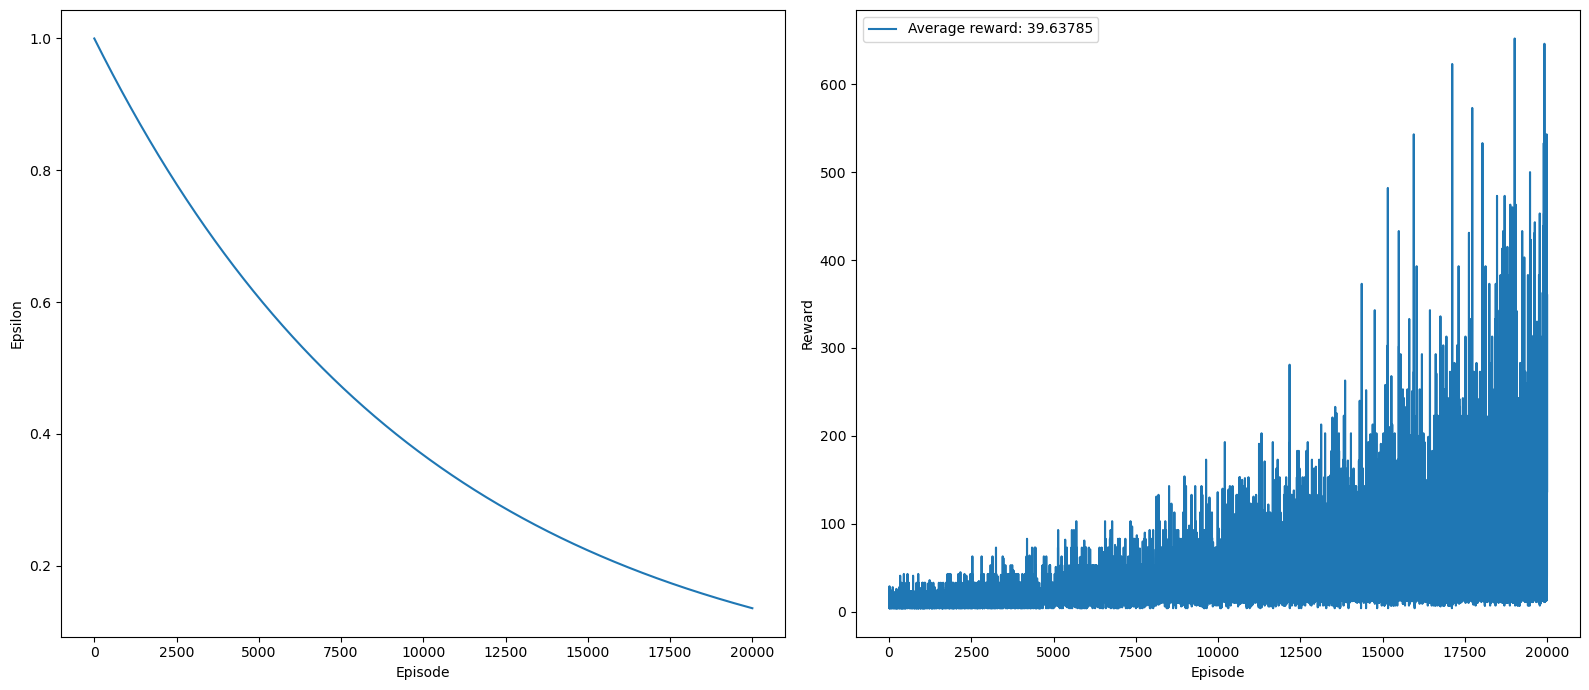

In [11]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
plt.plot(epsilons)
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.subplot(122)
plt.plot(episode_rewards, label=f"Average reward: {np.mean(episode_rewards)}")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(FIGS_PATH, "mc-train-best.png"))
plt.show()

100%|██████████| 100/100 [00:06<00:00, 16.13it/s]


[]

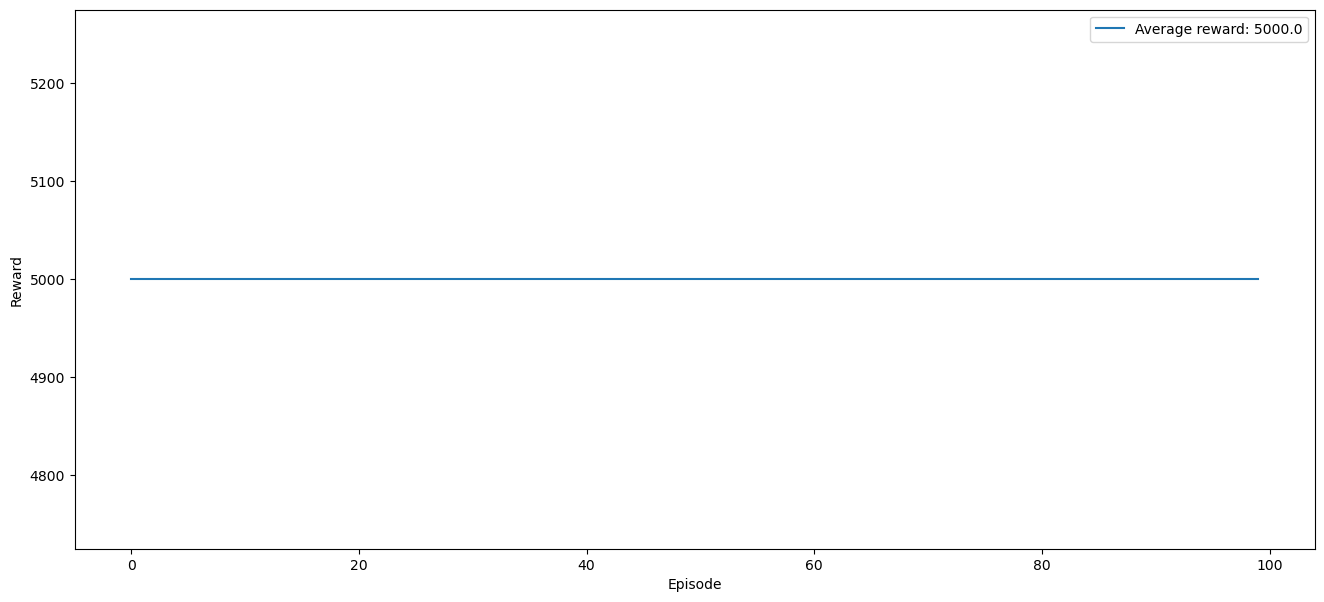

In [12]:
rewards = mc_agent.test(100, max_reward=5_000)

plt.figure(figsize=(16, 7))
plt.plot(rewards, label=f"Average reward: {np.mean(rewards)}")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.savefig(os.path.join(FIGS_PATH, "mc-test-best.png"))
plt.plot()

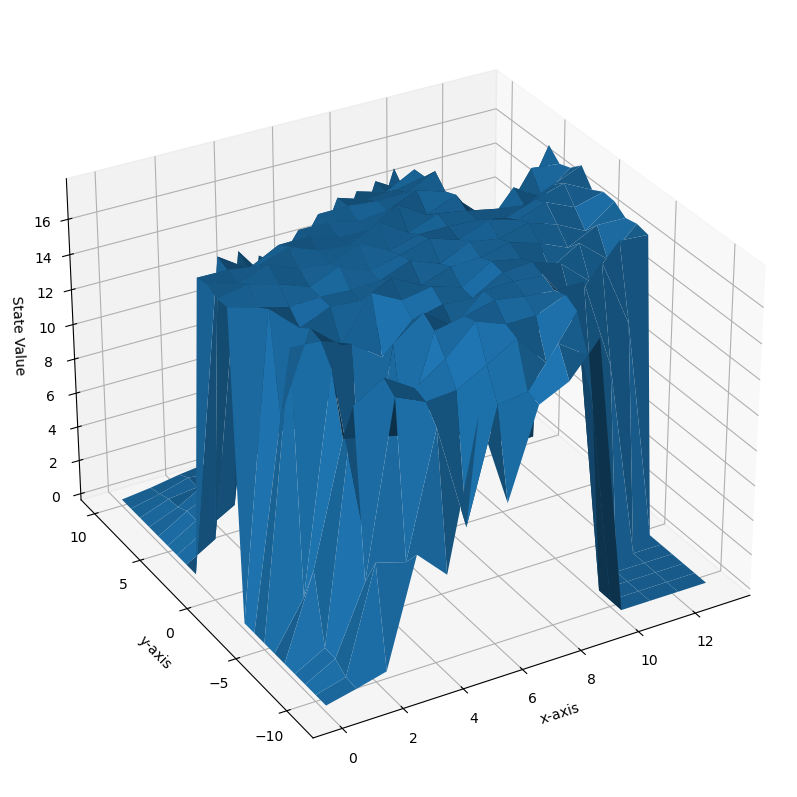

In [13]:
plot_state_values(
    mc_agent.Q,
    title="",
    save_file=os.path.join(FIGS_PATH, "mc-state-values-best.png"),
)

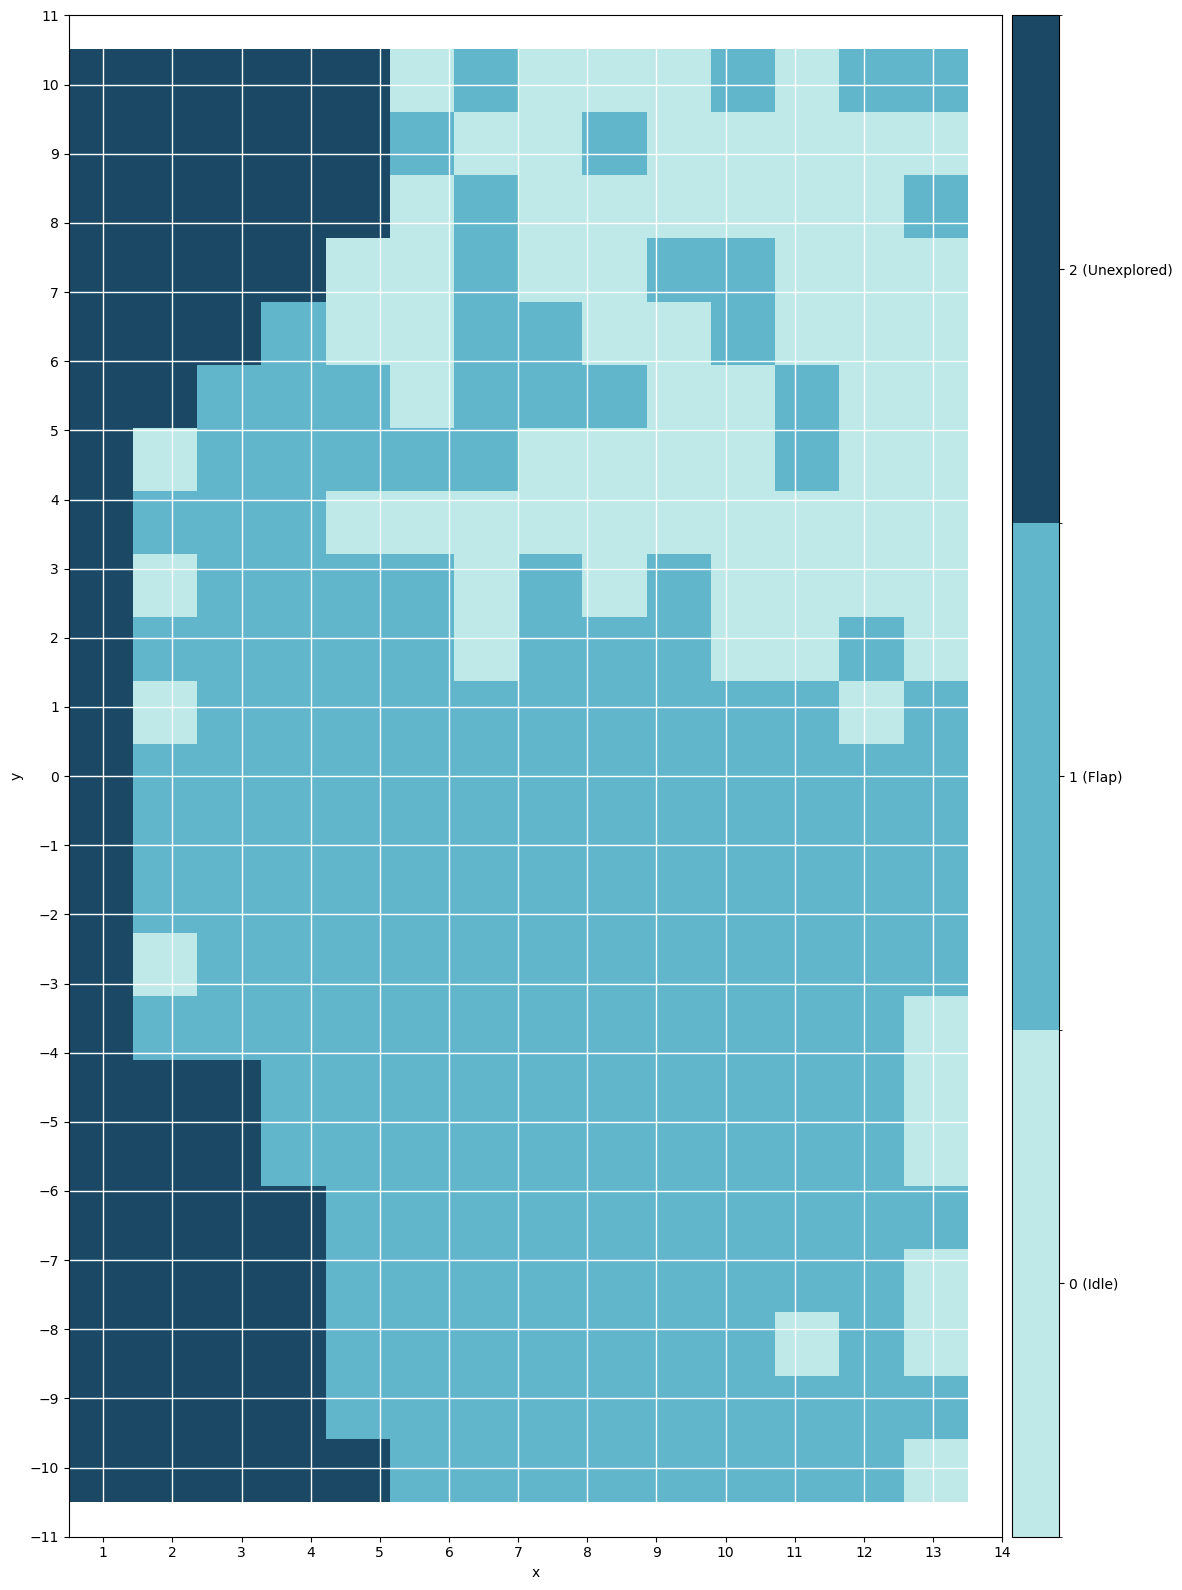

In [14]:
plot_policy(
    mc_agent.Q,
    title="",
    save_file=os.path.join(FIGS_PATH, "mc-policy-best.png"),
)